In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
games = pd.read_csv('D:/Python/Tripleten/Proyectos/Sprint6/games.csv')
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [280]:
games.columns = games.columns.str.lower() 
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [281]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [282]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [283]:
games['user_score'] = games['user_score'].replace('tbd',11)

In [284]:
games['year_of_release'] = games['year_of_release'].fillna(1979)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna(0)
games['critic_score'] = games['critic_score'].fillna(0)

In [285]:
games['name'] = games['name'].astype(str)
games['platform'] = games['platform'].astype(str)
games['year_of_release'] = games['year_of_release'].astype(int)
games['genre'] = games['genre'].astype(str)
games['user_score'] = games['user_score'].astype(float)
games['rating'] = games['rating'].astype(str)

In [286]:
games['sum_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  sum_total  
0     28.96      3.77         8.45          76.0         8.0      E      82.54  
1      3.58      6.81         0.77           0.0         0.0      0      40.24  
2     12.76      3.79         3.29          82.0         8.3      E      35.52  
3     10.93      3.28         2.95          80.0         8.0      E      32.77  
4      8.89     10.22         1.00           0.0         0.0      0      31.38  


In [287]:
list_sales = ['na_sales','eu_sales','jp_sales','other_sales','sum_total']
games_year=games.groupby('year_of_release')[list_sales].sum()
games_year=games_year.reset_index()
print(games_year)

    year_of_release  na_sales  eu_sales  jp_sales  other_sales  sum_total
0              1979     59.15     24.46      6.70         8.61      98.92
1              1980     10.59      0.67      0.00         0.12      11.38
2              1981     33.40      1.96      0.00         0.32      35.68
3              1982     26.92      1.65      0.00         0.31      28.88
4              1983      7.76      0.80      8.10         0.14      16.80
5              1984     33.28      2.10     14.27         0.70      50.35
6              1985     33.73      4.74     14.56         0.92      53.95
7              1986     12.50      2.84     19.81         1.93      37.08
8              1987      8.46      1.41     11.63         0.20      21.70
9              1988     23.87      6.59     15.76         0.99      47.21
10             1989     45.15      8.44     18.36         1.50      73.45
11             1990     25.46      7.63     14.88         1.40      49.37
12             1991     12.76      3.9

In [288]:
games_year = games_year.sort_values(by='sum_total', ascending=False)
print(games_year)

    year_of_release  na_sales  eu_sales  jp_sales  other_sales  sum_total
29             2008    348.69    181.14     60.25        81.42     671.50
30             2009    335.55    187.94     61.89        73.44     658.82
28             2007    309.89    157.82     60.29        76.75     604.75
31             2010    300.65    171.42     59.49        58.57     590.13
27             2006    262.13    127.89     73.74        53.95     517.71
32             2011    238.79    162.97     53.07        52.75     507.58
26             2005    242.15    121.11     54.27        40.29     457.82
25             2004    222.51    107.28     41.65        47.24     418.68
23             2002    216.19    109.75     41.76        27.27     394.97
34             2013    153.65    121.55     47.69        38.35     361.24
24             2003    193.61    103.81     34.20        25.92     357.54
33             2012    153.26    114.59     51.80        36.19     355.84
35             2014    132.27    122.7

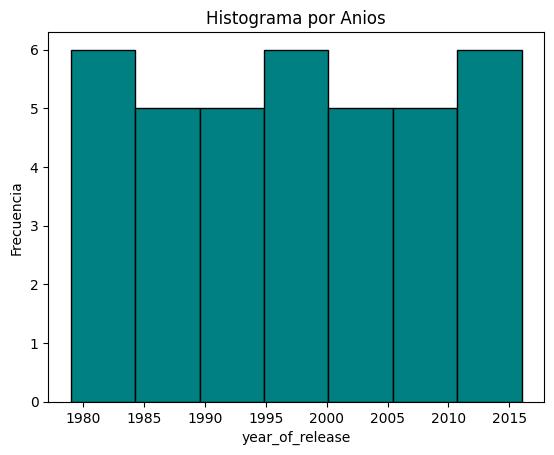

In [289]:
plt.hist(games_year['year_of_release'], bins=7, color='teal', edgecolor='black')
plt.xlabel('year_of_release')
plt.ylabel('Frecuencia')
plt.title('Histograma por Anios')
plt.show()

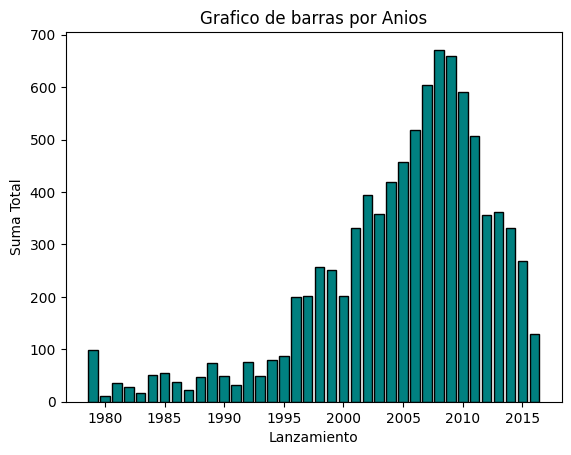

In [290]:
plt.bar(games_year['year_of_release'],games_year['sum_total'], color='teal', edgecolor='black')
plt.xlabel('Lanzamiento')
plt.ylabel('Suma Total')
plt.title('Grafico de barras por Anios')
plt.show()

In [291]:
games_platform = games.groupby('platform')[list_sales].sum()
games_platform = games_platform.reset_index()
print(games_platform)

   platform  na_sales  eu_sales  jp_sales  other_sales  sum_total
0      2600     90.60      5.47      0.00         0.91      96.98
1       3DO      0.00      0.00      0.10         0.00       0.10
2       3DS     83.49     61.48    100.67        13.36     259.00
3        DC      5.43      1.69      8.56         0.27      15.95
4        DS    382.40    188.89    175.57        59.26     806.12
5        GB    114.32     47.82     85.12         8.20     255.46
6       GBA    187.54     75.25     47.33         7.73     317.85
7        GC    133.46     38.71     21.58         5.18     198.93
8       GEN     21.05      6.05      2.70         0.97      30.77
9        GG      0.00      0.00      0.04         0.00       0.04
10      N64    139.02     41.06     34.22         4.38     218.68
11      NES    125.94     21.15     98.65         5.31     251.05
12       NG      0.00      0.00      1.44         0.00       1.44
13       PC     94.53    142.44      0.17        22.38     259.52
14     PCF

In [292]:
games_platform = games_platform.sort_values(by='sum_total', ascending=False)
print(games_platform.head(10))

   platform  na_sales  eu_sales  jp_sales  other_sales  sum_total
16      PS2    583.84    339.29    139.20       193.44    1255.77
28     X360    602.47    270.76     12.43        85.76     971.42
17      PS3    393.49    330.29     80.19       135.68     939.65
26      Wii    496.90    262.21     69.33        79.07     907.51
4        DS    382.40    188.89    175.57        59.26     806.12
15       PS    336.52    213.61    139.82        40.91     730.86
6       GBA    187.54     75.25     47.33         7.73     317.85
18      PS4    108.74    141.09     15.96        48.35     314.14
19      PSP    109.17     66.68     76.78        41.42     294.05
13       PC     94.53    142.44      0.17        22.38     259.52


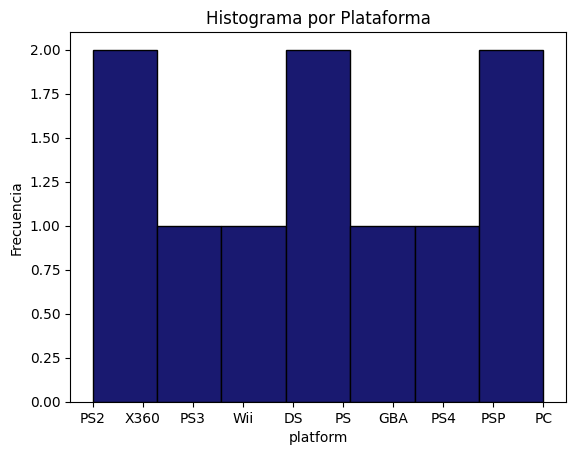

In [293]:
games_platform_10 = games_platform.head(10)
plt.hist(games_platform_10['platform'], bins=7, color='midnightblue', edgecolor='black')
plt.xlabel('platform')
plt.ylabel('Frecuencia')
plt.title('Histograma por Plataforma')
plt.show()

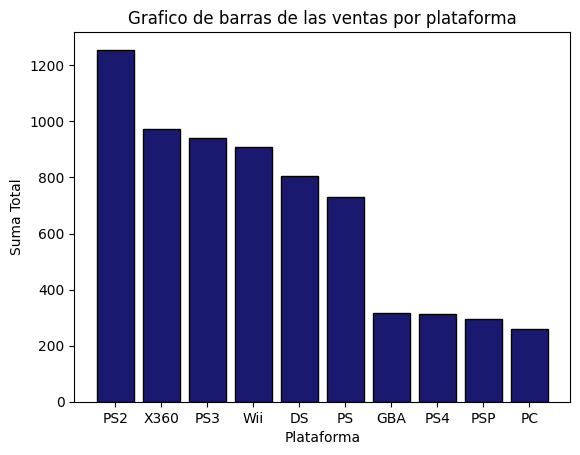

In [294]:
plt.bar(games_platform_10['platform'],games_platform_10['sum_total'], color='midnightblue', edgecolor='black')
plt.xlabel('Plataforma')
plt.ylabel('Suma Total')
plt.title('Grafico de barras de las ventas por plataforma')
plt.show()

In [295]:
games_year_platform = games.groupby(['year_of_release','platform'])[list_sales].sum()
print(games_year_platform)

                          na_sales  eu_sales  jp_sales  other_sales  sum_total
year_of_release platform                                                      
1979            2600          9.82      0.61      0.00         0.07      10.50
                3DS           0.84      0.21      0.05         0.09       1.19
                DS            2.09      0.48      0.55         0.22       3.34
                GB            0.68      0.31      0.00         0.04       1.03
                GBA           3.42      0.66      0.77         0.12       4.97
...                            ...       ...       ...          ...        ...
2016            PSV           0.15      0.39      3.56         0.15       4.25
                Wii           0.06      0.11      0.00         0.01       0.18
                WiiU          2.10      1.48      0.67         0.35       4.60
                X360          0.69      0.71      0.00         0.12       1.52
                XOne         14.27      9.63      0.

In [300]:
print(games.query("platform == 'PS2' and year_of_release == 2008").head())

                                         name platform  year_of_release  \
617            PES 2009: Pro Evolution Soccer      PS2             2008   
699                            FIFA Soccer 09      PS2             2008   
970                   Guitar Hero: World Tour      PS2             2008   
1016                 Dance Dance Revolution X      PS2             2008   
1036  Call of Duty: World at War Final Fronts      PS2             2008   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
617       Sports      0.13      0.07      0.26         2.05           0.0   
699       Sports      0.38      0.07      0.01         1.82          82.0   
970         Misc      1.00      0.03      0.00         0.77           0.0   
1016  Simulation      0.85      0.66      0.01         0.22          55.0   
1036     Shooter      0.61      0.18      0.00         0.94           0.0   

      user_score rating  sum_total  
617          0.0      0       2.51  
699         